# 3. Creating Features

## 요약

--------------------

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

accidents = pd.read_csv("data/accidents.csv")
autos = pd.read_csv("data/autos.csv")
concrete = pd.read_csv("data/concrete.csv")
customer = pd.read_csv("data/customer.csv")

C:\Users\dowra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


- 새로운 피쳐에 대한 팁들
- 가능하다면, `data documentation` 읽기
- **`도메인 지식` 얻기** : 출발점으론 위키피디아가 좋으나, 책이나 저널 기사 등이 가장 좋은 정보를 준다.
- **이전 작업물들** 보기 : 이전 캐글 Competition 등에 좋은 정보들이 있다.
- **시각화** 활용하기 : 시각화는 피쳐나 복잡한 관계의 분포를 간단하게 드러낸다. 피쳐 엔지니어링을 할 때는 데이터셋을 시각화할 것!

## 수학적 변환
- 수학 공식을 통해 수치적 특징 사이의 관계를 표현할 수 있다.
- 예를 들면 자동차 엔진을 설명하는 공식으로 `Stroke Ratio`가 있는데, 이는 엔진의 효율성과 성능을 나타낸다.

In [7]:
autos['stroke_ratio'] = autos.stroke / autos.bore
autos[['stroke', 'bore', 'stroke_ratio']].head(3)

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776


- 조합이 복잡할수록 모델이 더 받아들이기 더 복잡한 결과를 낳는다. 

In [9]:
autos['displacement'] = (
np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.num_of_cylinders)

- 시각화는 변환을 제안하기도 한다. : 제곱이나 로그 변환 등
- `WindSpeed`는 매우 `skewed`인데, 이를 일반화하는 방법으로 로그를 활용할 수 있다.

<AxesSubplot:xlabel='LogWindSpeed', ylabel='Density'>

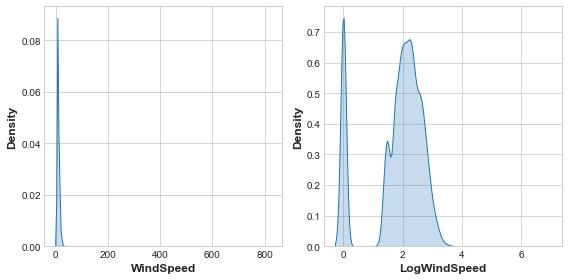

In [11]:
accidents['LogWindSpeed'] = accidents.WindSpeed.apply(np.log1p)

fig, ax = plt.subplots(1, 2, figsize = (8, 4))
sns.kdeplot(accidents.WindSpeed, shade = True, ax = ax[0])
sns.kdeplot(accidents.LogWindSpeed, shade = True, ax = ax[1])


- 캐글에는 [데이터 클리닝](https://www.kaggle.com/learn/data-cleaning)코스도 제공 중이라구!

## Count
- 유무를 나타내는 피쳐들이 오기도 하는데, 이 때 쓸 수 있는 집계 열이 `Count`이다.
- 주로 이진이나 Bool로 오는데 파이썬에서는 Bool도 정수인 것처럼 Integer을 가할 수 있다.

In [16]:
roadway_features = ['Amenity', 'Bump', 'Crossing', 'GiveWay', 'Junction', 'NoExit', 'Railway', 'Roundabout', 'Station', 'Stop', 'TrafficCalming', 'TrafficSignal']
accidents['RoadwayFeatures'] = accidents[roadway_features].sum(axis = 1)

accidents[roadway_features + ['RoadwayFeatures']].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,1
8,False,False,True,False,False,False,False,False,False,False,False,True,1
9,False,False,False,False,False,False,False,False,False,False,False,False,0


- Bool값을 만들어낼 수도 있다 : 0보다 큰 Feature의 수가 Components에 들어감

In [18]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete[components].gt(0) # 0보다 크면 True, 아니면 False (초과)
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

concrete[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


## 복잡한 피쳐 만들기 / 분해하기
이런 것들이 있겠다.
```
ID numbers: '123-45-6789'
Phone numbers: '(999) 555-0123'
Street addresses: '8241 Kaggle Ln., Goose City, NV'
Internet addresses: 'http://www.kaggle.com
Product codes: '0 36000 29145 2'
Dates and times: 'Mon Sep 30 07:06:05 2013'
```

- `Phone Number`의 `(999)`는 지역 코드이므로 어디서 전화하는지를 알 수 있다.
- 이 때 쓸 수 있는 건 `str`로, `string`에 사용할 수 있는 `split` 같은 것들을 적용할 수 있게 하는 `accessor`이다. 

분리하기

In [19]:
customer[['Type', 'Level']] = (
                                customer['Policy'].str.split(' ', expand = True))
customer[['Policy', 'Type', 'Level']].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


합치기

In [20]:
autos["make_and_style"] = autos["make"] + "_" + autos["body_style"]
autos[["make", "body_style", "make_and_style"]].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


그 외에도 이런 것들을 할 수 있음
- [날짜 파싱](https://www.kaggle.com/alexisbcook/parsing-dates)
- [경/위도 파싱](https://www.kaggle.com/learn/geospatial-analysis)

## Group Transform

여러 열에 집계 함수를 적용하는 것. 이를 통해 "사는 지역에 따른 평균 수입", "평일에 개봉하는 영화 장르의 비율" 같은 것들을 볼 수 있다. 카테고리에 따른 Group Transform은 탐색할 대상으로 좋을 수 있다.  

**Group Transform은 그룹화하는 feature + 집계 함수 + 집계 대상인 feature 3가지로 구성된다.**



In [21]:
customer['AverageIncome'] = (customer.groupby('State')['Income'].transform('mean'))

customer[['State', 'Income', 'AverageIncome']].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


- `built-in method`로는 `mean, max, min, median, var, std, count` 등이 있다. 

- 이런 식의 연산도 가능하다

In [22]:
customer["StateFreq"] = (
    customer.groupby("State")
    ["State"]
    .transform("count")
    / customer.State.count()
)

customer[["State", "StateFreq"]].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


- 훈련 / 검증 세트 분리를 이용한다면, 독립성을 유지하기 위해 트레이닝 세트에만 그룹 피쳐를 적용하고 이를 그대로 검증 세트에 쓰는 게 제일 좋다. 

In [23]:
# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["ClaimAmount"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

df_valid[["Coverage", "AverageClaim"]].head(10)

,Coverage,AverageClaim
0,Basic,381.346526
1,Basic,381.346526
2,Basic,381.346526
3,Basic,381.346526
4,Basic,381.346526
5,Premium,639.246918
6,Basic,381.346526
7,Basic,381.346526
8,Basic,381.346526
9,Basic,381.346526


### 피쳐 만들기를 위한 가이드라인
피쳐를 만들 때 모델의 강점과 약점을 숙지하고 있는 건 도움이 된다. 이를 위한 가이드라인임.
- 선형 모델은 합, 차를 학습하지만 이 이상 복잡한 것은 학습할 수 없다.
- Ratio(비율)은 대부분의 모델에서 학습하기 어려운 것으로 보인다. 이 때 `Ratio Combination`은 쉽게 좋은 성능을 얻는 방법이 자주 된다.
- 선형 모델과 뉴럴 네트워크는 정규화된(Normalized) 피쳐에서 더 잘 작동한다. 특히 뉴럴 네트워크는 값이 0에서 너무 멀어지지 않을 필요가 있다.
- 트리 기반의 모델(랜덤 포레스트, XGBoost 등)은 정규화가 이득이 될 때도 있지만, 그럴 필요성이 강하진 않다.
- 트리모델은 또한 대부분 피쳐의 조합을 근사화하는 방법을 배울 수 있다. 트리 모델에서 피쳐를 만드는 건 특히 데이터가 제한된 상황에서 조합을 추가로 제공할 수 있기 때문에 매우 중요하다.
- `Count`는 트리 모델에 특히 도움이 된다. 모델 자체적으로 여러 피쳐를 한꺼번에 집계하는 자연스러운 방법이 없기 때문이다.